In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('studentscores.csv')
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


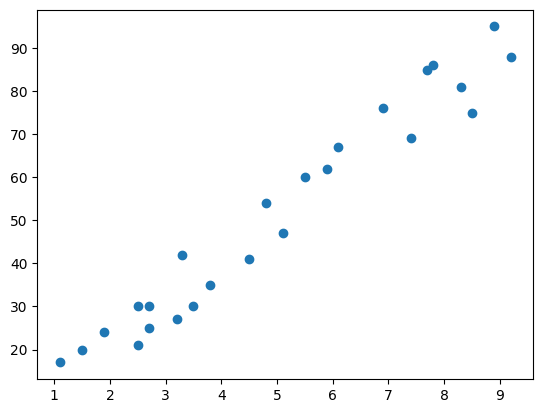

In [ ]:
plt.scatter(data['Hours'], data['Scores'])
plt.show()

In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [ ]:
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
class Linear_Regression_Model():
  def __init__(self, learning_rate, iterations):
    self.learning_rate = learning_rate
    self.iterations = iterations

  def predict(self, X):
    return X.dot(self.slope) + self.const # Y = m*X + b

  def fit(self, X, Y):
    self.m, self.n = X.shape
    self.slope = np.zeros(self.n)
    self.const = 0
    self.X = X
    self.Y = Y

    for i in range(self.iterations):
      self.update_weights()

    return self

  def update_weights(self):
    Y_pred = self.predict(self.X)
    dW = -(2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
    dConst = - 2 * np.sum(self.Y - Y_pred) / self.m

    self.slope = self.slope - self.learning_rate * dW
    self.const = self.const - self.learning_rate * dConst

    return self

In [ ]:
model = Linear_Regression_Model(learning_rate=0.01, iterations=1000)
model.fit(X, Y)

In [ ]:
Y_pred = model.predict(X)
print(Y_pred)

[26.91171724 52.33687281 33.75695143 85.58515317 36.69062323 17.13281125
 92.43038736 56.24843521 83.62937197 28.86749844 77.76202838 60.1599976
 46.46952922 34.73484203 13.22124886 89.49671557 26.91171724 21.04437365
 62.1157788  74.82835658 28.86749844 49.40320102 39.62429503 69.93890359
 78.73991898]


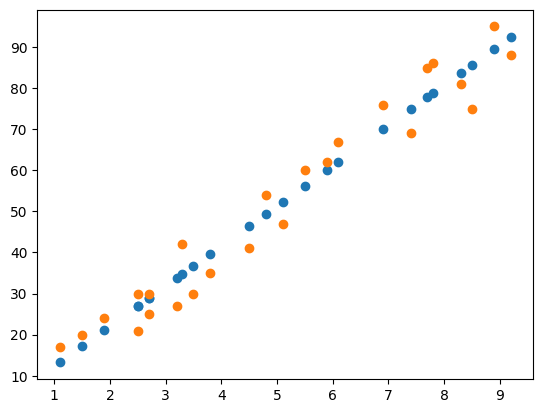

In [ ]:
plt.scatter(X, Y_pred)
plt.scatter(data['Hours'], data['Scores'])
plt.show()

In [ ]:
print(f"Slope = {model.slope.item()}, Constant = {model.const}")

Slope = 9.778905988234964, Constant = 2.4644522714760995


In [ ]:
data = pd.read_csv('50_Startups.csv')
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [ ]:
print(X)

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)

[182645.56  91790.61 110594.11  84710.77 101145.55 127864.55  65947.93
 152701.92 122782.75  91391.77]
[182645.56  91790.61 110594.11  84710.77 101145.55 127864.55  65947.93
 152701.92 122782.75  91391.77]


In [ ]:
for i, (pred, actual) in enumerate(zip(y_pred, y_test)):
  print(f"Sample {i+1}: Prediction: {pred:.2f} , Actual: {actual:.2f}, Difference: {pred-actual:.2f}")

Sample 1: Prediction: 182645.56 , Actual: 182645.56, Difference: 0.00
Sample 2: Prediction: 91790.61 , Actual: 91790.61, Difference: 0.00
Sample 3: Prediction: 110594.11 , Actual: 110594.11, Difference: 0.00
Sample 4: Prediction: 84710.77 , Actual: 84710.77, Difference: -0.00
Sample 5: Prediction: 101145.55 , Actual: 101145.55, Difference: -0.00
Sample 6: Prediction: 127864.55 , Actual: 127864.55, Difference: 0.00
Sample 7: Prediction: 65947.93 , Actual: 65947.93, Difference: -0.00
Sample 8: Prediction: 152701.92 , Actual: 152701.92, Difference: 0.00
Sample 9: Prediction: 122782.75 , Actual: 122782.75, Difference: -0.00
Sample 10: Prediction: 91391.77 , Actual: 91391.77, Difference: -0.00


In [ ]:
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")

Coefficients: [ 2.36992324e-16  1.00000000e+00 -2.22044605e-16]
Intercept: -5.820766091346741e-11


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

data = pd.read_csv('studentscores.csv')
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_poly = poly.fit_transform(X)
print(X_poly)

[[  1.      2.5     6.25   15.625]
 [  1.      5.1    26.01  132.651]
 [  1.      3.2    10.24   32.768]
 [  1.      8.5    72.25  614.125]
 [  1.      3.5    12.25   42.875]
 [  1.      1.5     2.25    3.375]
 [  1.      9.2    84.64  778.688]
 [  1.      5.5    30.25  166.375]
 [  1.      8.3    68.89  571.787]
 [  1.      2.7     7.29   19.683]
 [  1.      7.7    59.29  456.533]
 [  1.      5.9    34.81  205.379]
 [  1.      4.5    20.25   91.125]
 [  1.      3.3    10.89   35.937]
 [  1.      1.1     1.21    1.331]
 [  1.      8.9    79.21  704.969]
 [  1.      2.5     6.25   15.625]
 [  1.      1.9     3.61    6.859]
 [  1.      6.1    37.21  226.981]
 [  1.      7.4    54.76  405.224]
 [  1.      2.7     7.29   19.683]
 [  1.      4.8    23.04  110.592]
 [  1.      3.8    14.44   54.872]
 [  1.      6.9    47.61  328.509]
 [  1.      7.8    60.84  474.552]]


In [ ]:
model = LinearRegression()
model.fit(X_poly, Y)


LinearRegression()

In [ ]:
print(model.coef_)
print(model.intercept_)

[ 0.         -3.79705913  2.99874775 -0.19257785]
19.317706990502344


In [ ]:
y_pred = model.predict(X_poly)
print(y_pred)

[25.55820366 52.4044897  31.56390366 85.43535572 34.50588455 19.71935048
 88.24070983 57.10586101 84.27233622 27.13600857 79.9579611  61.75002055
 45.40692604 32.52310457 18.5131056  87.29327399 25.55820366 21.60788253
 64.02753655 77.39372855 27.13600857 48.88540147 37.62366789 72.62482165
 80.75625387]


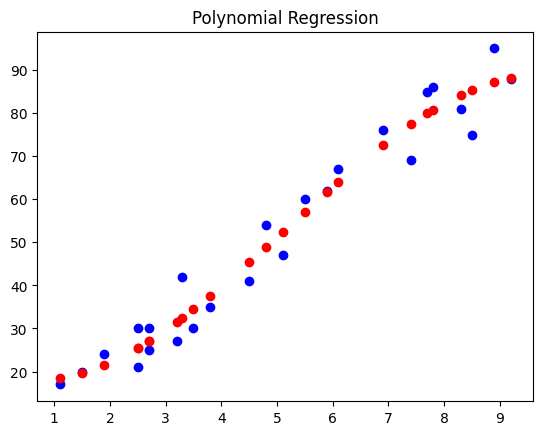

In [ ]:
plt.scatter(X, Y, color='blue')
plt.scatter(X, y_pred, color='red')
plt.title('Polynomial Regression')
plt.show()